For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
4. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.
For each chart, make sure to use a copy of the data frame. Unit tests are written for you under test_module.py.

The boilerplate also includes commands to save and return the image.

1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')
df = df[
    (df['value'] >= df['value'].quantile(0.025))
  & (df['value'] <= df['value'].quantile(0.975))]

3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

Text(0, 0.5, 'Page Views')

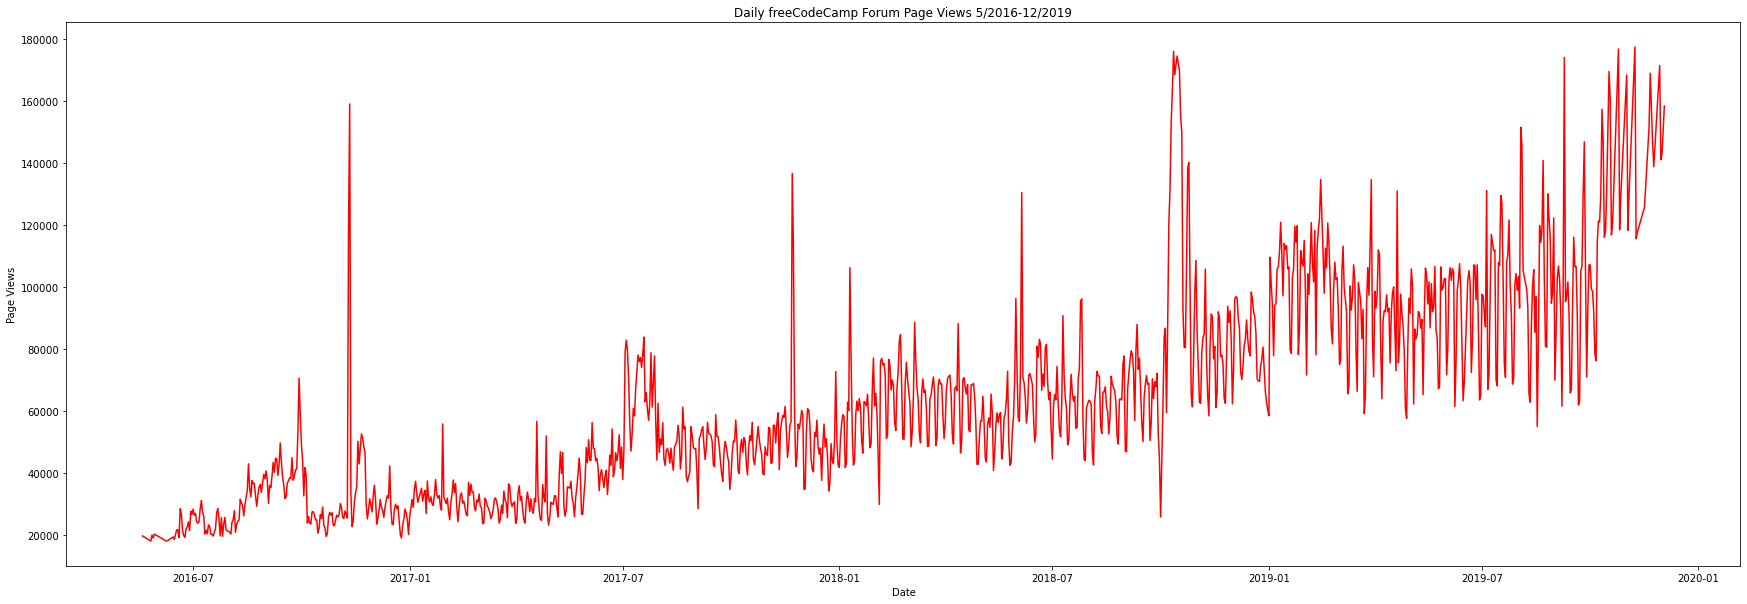

In [109]:
plt.figure(figsize=(30, 10))
plt.plot(df.index, df['value'], 'r')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel('Date')
plt.ylabel('Page Views')


4. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

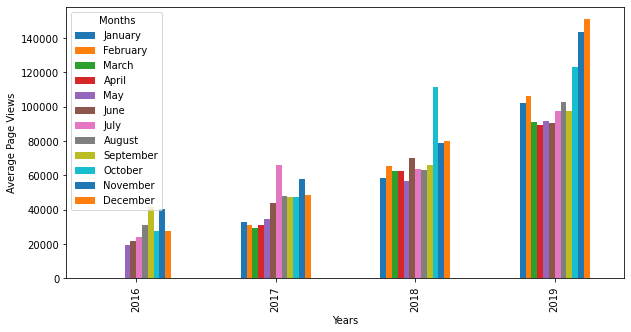

In [178]:
df2 = df.copy()
df2['year'] = pd.DatetimeIndex(df2.index).year
df2['month'] = pd.DatetimeIndex(df2.index).month
df2 = df2.groupby(['year','month']).value.mean()
df2 = df2.unstack()
  
fig = df2.plot.bar(legend = True, figsize = (10, 5),xlabel = 'Years', ylabel = 'Average Page Views').figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title='Months')

5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data. For each chart, make sure to use a copy of the data frame. Unit tests are written for you under test_module.py.

Text(0, 0.5, 'Page Views')

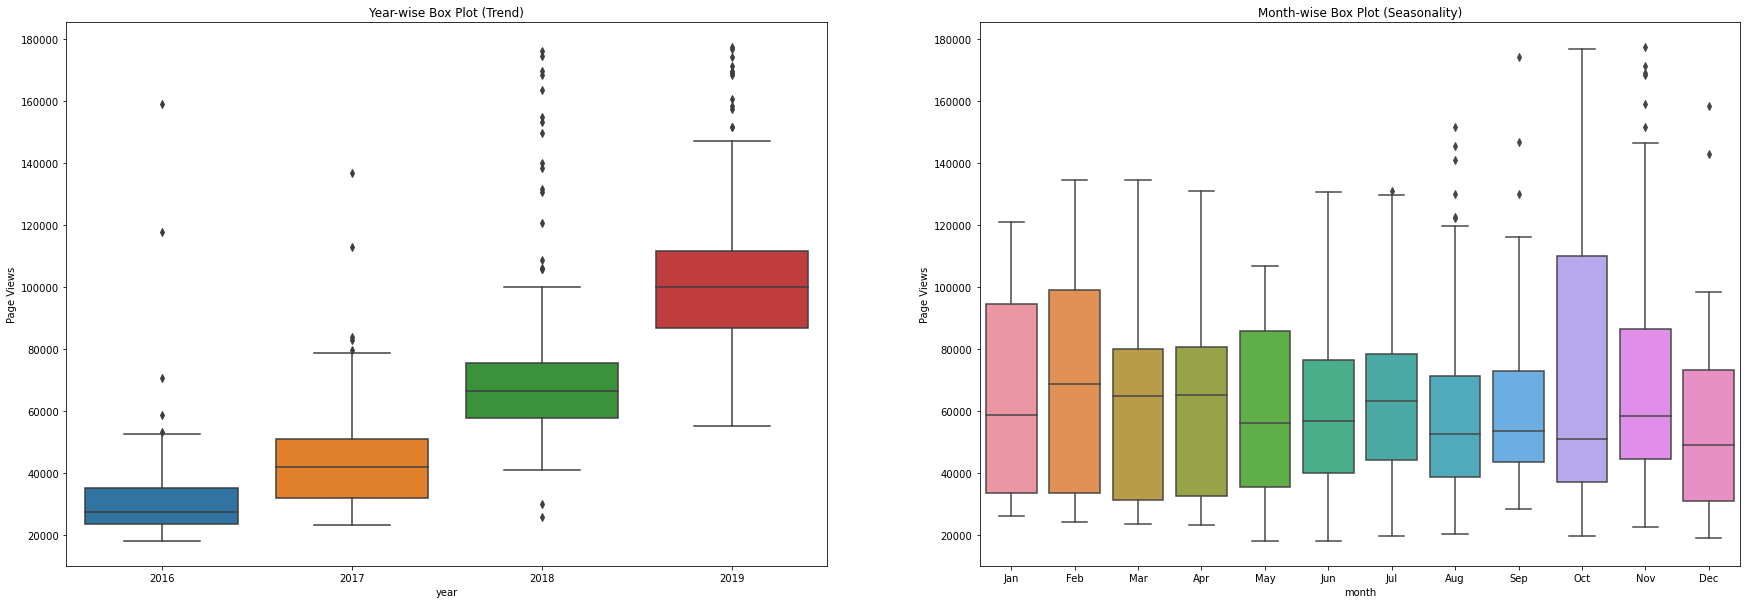

In [179]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box['num_month'] = df_box['date'].dt.month
df_box = df_box.sort_values('num_month')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
ax[0] = sns.boxplot( y=df_box["value"], x=df_box["year"], ax = ax[0])
ax[1] = sns.boxplot( y=df_box["value"], x=df_box["month"], ax = ax[1])
ax[0].set_title('Year-wise Box Plot (Trend)')
ax[0].set_ylabel('Page Views')
ax[1].set_title('Month-wise Box Plot (Seasonality)')
ax[1].set_ylabel('Page Views')

In [180]:
df_box

,date,value,year,month,num_month
210,2017-01-06,37353,2017,Jan,1
937,2019-01-06,94108,2019,Jan,1
936,2019-01-05,77897,2019,Jan,1
935,2019-01-04,94514,2019,Jan,1
934,2019-01-03,100710,2019,Jan,1
...,...,...,...,...,...
567,2017-12-29,72819,2017,Dec,12
566,2017-12-28,51018,2017,Dec,12
565,2017-12-27,43075,2017,Dec,12
201,2016-12-28,28424,2016,Dec,12
